In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
#dataset=pd.read_csv(r'C:\Users\Password\Downloads\feature\Filtering\df.csv')
dataset=pd.read_csv(r'df.csv')

In [4]:
dataset.columns

Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'model year2', 'origin', 'Car name'],
      dtype='object')

In [5]:
dataset=dataset.drop(['Unnamed: 0'],axis=1)

In [6]:
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year2,origin,Car name
0,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11,70,1,buick skylark 320
2,18,8,318,150,3436,11,70,1,plymouth satellite
3,16,8,304,150,3433,12,70,1,amc rebel sst
4,17,8,302,140,3449,10,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27,4,140,86,2790,15,82,1,ford mustang gl
394,44,4,97,52,2130,24,82,2,vw pickup
395,32,4,135,84,2295,11,82,1,dodge rampage
396,28,4,120,79,2625,18,82,1,ford ranger


In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [8]:
X_en=dataset.iloc[:,8].values

In [9]:
X_en = labelencoder.fit_transform(X_en.astype(str))

In [10]:
X= dataset.iloc[:,1:7]
X['Car']=X_en

In [11]:
y=dataset.iloc[:,0].values

In [12]:
full_data=X.copy()
full_data['mpg']=y
full_data.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model year2,Car,mpg
0,8,307,130,3504,12,70,48,18
1,8,350,165,3693,11,70,35,15


In [13]:
importances=full_data.drop('mpg',axis=1).apply(lambda x:x.corr(full_data.mpg))
indices=np.argsort(importances)
print(importances[indices])

displacement   -0.790739
weight         -0.757705
cylinders      -0.748610
horsepower     -0.731249
model year2     0.193226
Car             0.266526
acceleration    0.292204
dtype: float64


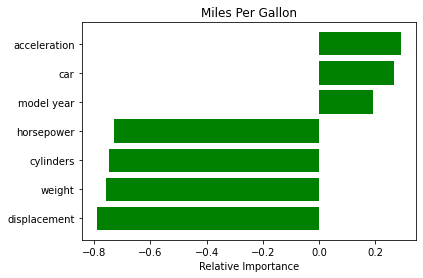

In [14]:
names=['cylinders','displacement','horsepower','weight','acceleration','model year', 'car']
plt.title('Miles Per Gallon')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [15]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.4:
        print(names[i])

cylinders
displacement
horsepower
weight


In [16]:
X=dataset[['cylinders','displacement','horsepower','weight']]

In [17]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

cylinders  is highly  correlated  with  displacement
cylinders  is highly  correlated  with  horsepower
cylinders  is highly  correlated  with  weight
displacement  is highly  correlated  with  cylinders
displacement  is highly  correlated  with  horsepower
displacement  is highly  correlated  with  weight
horsepower  is highly  correlated  with  cylinders
horsepower  is highly  correlated  with  displacement
horsepower  is highly  correlated  with  weight
weight  is highly  correlated  with  cylinders
weight  is highly  correlated  with  displacement
weight  is highly  correlated  with  horsepower


In [18]:
mi = mutual_info_regression(X, y)

<AxesSubplot:>

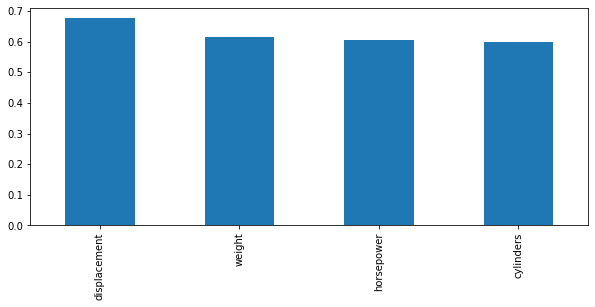

In [19]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))